# Final Project

Analysis Summary

In this analysis I analyzed tweets by two different electric guitar brands. Fender guitar and Gibson guitars. In this analysis I Used Twitter API to collect the Data. I perform some text analysis including word clouds and word frequency. I then performed sentiment analysis on both sets of twitter data. This is to determine the tone of each company on and thier social media presence. I included a graph of the sentiment scores so that you can visualize the distrubtion of scores. This could be used by a manager to understand how they are coming across on twitter to their customers compared to other brands. I then moved on topic modeling. I developed a model for each brand which catogorizes tweets into a handful of topics. This can be used managers to better understand their social media presence and to categorize topics and understand maybe what topics that could be focused on more or less. I then moved on to a hashtag network analysis so this could be used to understand what hashtags are being maentioned together and what things that the brands are promoting are linked to each other. Overall there are many mangerial perpectives that can be drawn from my analysis.

In [3]:
import csv
import pandas as pd
import re
import json
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import pandas as pd

import seaborn as sns
import scipy.stats as stats
from scipy import stats
from pandas.tools import plotting

import nltk
from nltk.corpus import stopwords
from nltk import FreqDist, word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
#csv
import csv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

# Data Collection

In [4]:
df = pd.read_csv("data/sample_tweetsgibsong.csv")
df.head(10)

,handle,time,tweet
0,gibsonguitar,5/7/2019 14:52,A Modern Les Paul for every player. #gibson #t...
1,gibsonguitar,5/6/2019 14:37,Be Relevant with Gibson’s Modern Collection. #...
2,gibsonguitar,5/5/2019 22:07,@BillyFGibbons of @ZZTop stopped by to try out...
3,gibsonguitar,5/4/2019 4:44,@BillyFGibbons of @ZZTop stopped by to try out...
4,gibsonguitar,5/3/2019 15:05,The Les Paul Standard 50's has a solid mahogan...
5,gibsonguitar,5/2/2019 19:46,Dive into the new Les Paul Standard ‘50s with ...
6,gibsonguitar,5/2/2019 15:25,A Classic Reborn. The new Les Paul Standard ‘5...
7,gibsonguitar,5/1/2019 22:10,The new Les Paul Junior Tobacco Burst and Les ...
8,gibsonguitar,5/1/2019 15:16,Want to win a Les Paul Standard 60’s from the ...
9,gibsonguitar,4/30/2019 23:09,1961 was just the beginning for the Gibson SG ...


In [5]:
dff = pd.read_csv("data/sample_tweetsfender.csv")
dff.head(10)

,handle,time,tweets
0,Fender,5/7/2019 18:04,The Duff McKagan Deluxe Precision Bass was ins...
1,Fender,5/6/2019 22:19,@RibeiroR72 We announced the winners last week...
2,Fender,5/6/2019 21:32,A few great photos from the opening of the Fen...
3,Fender,5/6/2019 21:00,Nothing beats catching a few riffs on a Surf G...
4,Fender,5/6/2019 18:31,RT @rockhall: The Hoss. @muddyofficial preferr...
5,Fender,5/5/2019 16:00,Head to the Fender website to scope out the la...
6,Fender,5/4/2019 16:00,What vibes are you getting from this Surf Gree...
7,Fender,5/4/2019 11:00,"So, who wants to see Mumford &amp; Sons at @al..."
8,Fender,5/3/2019 15:33,Fender at @thegreatescape will be epic and we ...
9,Fender,5/3/2019 15:02,Congrats @individual6827 @guynamedfawkes @Jone...


# Data Processing

In [6]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [7]:
df['cleaned'] = df['tweet']
df['cleaned'] = df['cleaned'].str.replace('http\S+|www.\S+', '')
df['cleaned'] = df['cleaned'].str.replace('\d+', '')
df['cleaned'] = df['cleaned'].str.replace('[^a-zA-Z]+', ' ')
df['cleaned'] = df['cleaned'].str.findall('\w{3,}').str.join(' ')
df['cleaned'] = df['cleaned'].str.replace(r'\b(\w{1,3})\b', '')
df['cleaned'] = df['cleaned'].str.lower()
df['cleaned'] = df['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

df['words'] = df['cleaned'].str.split()
df['words'] = df['words'].apply(', '.join)


In [8]:
dff['cleaned'] = dff['tweets']
dff['cleaned'] = dff['cleaned'].str.replace('http\S+|www.\S+', '')
dff['cleaned'] = dff['cleaned'].str.replace('\d+', '')
dff['cleaned'] = dff['cleaned'].str.replace('[^a-zA-Z]+', ' ')
dff['cleaned'] = dff['cleaned'].str.findall('\w{3,}').str.join(' ')
dff['cleaned'] = dff['cleaned'].str.replace(r'\b(\w{1,3})\b', '')
dff['cleaned'] = dff['cleaned'].str.lower()
dff['cleaned'] = dff['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))


dff['words'] = dff['cleaned'].str.split()
dff['words'] = dff['words'].apply(', '.join)


# Text Analysis

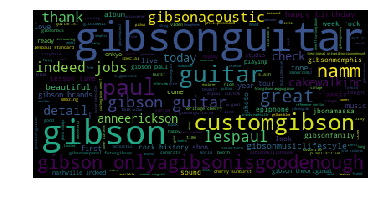

In [9]:
wordcloud = WordCloud().generate(' '.join(df['words']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

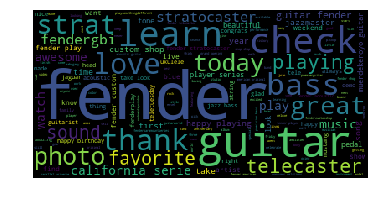

In [ ]:
wordcloud = WordCloud().generate(' '.join(dff['words']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
from collections import Counter

In [ ]:
fdist = list(Counter(" ".join(df['cleaned']).split(" ")).items())

# convert to dataframe
freq_word = []

for k,v in fdist:
    freq_word.append([k,v])

wordlist = pd.DataFrame(freq_word)

#
wordlist.sort_values(1, ascending=False).head(20)

,0,1
4,gibson,859
355,gibsonguitar,690
410,lespaul,273
53,guitar,247
245,customgibson,230
1,paul,229
6,onlyagibsonisgoodenough,173
199,namm,142
195,great,132
206,rock,120


In [ ]:
fdist = list(Counter(" ".join(dff['cleaned']).split(" ")).items())

# convert to dataframe
freq_word = []

for k,v in fdist:
    freq_word.append([k,v])

wordlist = pd.DataFrame(freq_word)

#
wordlist.sort_values(1, ascending=False).head(20)

,0,1
19,fender,1152
39,guitar,316
90,check,187
240,happy,172
52,series,171
184,learn,167
4,bass,159
201,stratocaster,132
40,telecaster,128
178,playing,126


# Sentiment Analysis

## Vader Sentiment

In [ ]:
vs = SentimentIntensityAnalyzer()

In [ ]:
df['score'] = df['cleaned'].apply(lambda x: vs.polarity_scores(x)['compound'])
df.head(10)

,handle,time,tweet,cleaned,words,score
0,gibsonguitar,5/7/2019 14:52,A Modern Les Paul for every player. #gibson #t...,modern paul every player gibson theoriginal on...,"modern, paul, every, player, gibson, theorigin...",0.0000
1,gibsonguitar,5/6/2019 14:37,Be Relevant with Gibson’s Modern Collection. #...,relevant gibson modern collection gibson theor...,"relevant, gibson, modern, collection, gibson, ...",0.0000
2,gibsonguitar,5/5/2019 22:07,@BillyFGibbons of @ZZTop stopped by to try out...,billyfgibbons zztop stopped paul goldtop reiss...,"billyfgibbons, zztop, stopped, paul, goldtop, ...",-0.2263
3,gibsonguitar,5/4/2019 4:44,@BillyFGibbons of @ZZTop stopped by to try out...,billyfgibbons zztop stopped paul goldtop reiss...,"billyfgibbons, zztop, stopped, paul, goldtop, ...",-0.2263
4,gibsonguitar,5/3/2019 15:05,The Les Paul Standard 50's has a solid mahogan...,paul standard solid mahogany body maple rounde...,"paul, standard, solid, mahogany, body, maple, ...",0.1531
5,gibsonguitar,5/2/2019 19:46,Dive into the new Les Paul Standard ‘50s with ...,dive paul standard nallecolt vintagetrouble he...,"dive, paul, standard, nallecolt, vintagetroubl...",0.0000
6,gibsonguitar,5/2/2019 15:25,A Classic Reborn. The new Les Paul Standard ‘5...,classic reborn paul standard returns classic d...,"classic, reborn, paul, standard, returns, clas...",0.3400
7,gibsonguitar,5/1/2019 22:10,The new Les Paul Junior Tobacco Burst and Les ...,paul junior tobacco burst paul special yellow ...,"paul, junior, tobacco, burst, paul, special, y...",0.4019
8,gibsonguitar,5/1/2019 15:16,Want to win a Les Paul Standard 60’s from the ...,want paul standard collection follow link chance,"want, paul, standard, collection, follow, link...",0.3182
9,gibsonguitar,4/30/2019 23:09,1961 was just the beginning for the Gibson SG ...,beginning gibson gibson theoriginal onlyagibso...,"beginning, gibson, gibson, theoriginal, onlyag...",0.0000


In [ ]:
df["score"].mean()

0.2331147566719001

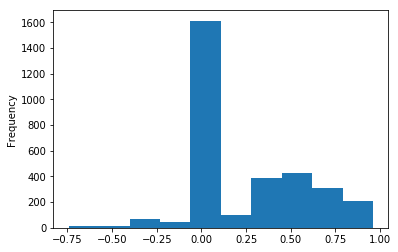

In [ ]:
df['score'].plot.hist()

In [ ]:
dff['score'] = dff['cleaned'].apply(lambda x: vs.polarity_scores(x)['compound'])
dff.head(10)

,handle,time,tweets,cleaned,words,score
0,Fender,5/7/2019 18:04,The Duff McKagan Deluxe Precision Bass was ins...,duff mckagan deluxe precision bass inspired ja...,"duff, mckagan, deluxe, precision, bass, inspir...",0.8074
1,Fender,5/6/2019 22:19,@RibeiroR72 We announced the winners last week...,ribeiror announced winners last week,"ribeiror, announced, winners, last, week",0.4767
2,Fender,5/6/2019 21:32,A few great photos from the opening of the Fen...,great photos opening fender exhibit museumfull...,"great, photos, opening, fender, exhibit, museu...",0.6249
3,Fender,5/6/2019 21:00,Nothing beats catching a few riffs on a Surf G...,nothing beats catching riffs surf green jaguar...,"nothing, beats, catching, riffs, surf, green, ...",0.3182
4,Fender,5/6/2019 18:31,RT @rockhall: The Hoss. @muddyofficial preferr...,rockhall hoss muddyofficial preferred guitar f...,"rockhall, hoss, muddyofficial, preferred, guit...",0.4215
5,Fender,5/5/2019 16:00,Head to the Fender website to scope out the la...,head fender website scope latest additions cal...,"head, fender, website, scope, latest, addition...",0.0000
6,Fender,5/4/2019 16:00,What vibes are you getting from this Surf Gree...,vibes getting surf green squier classic vibe j...,"vibes, getting, surf, green, squier, classic, ...",0.0000
7,Fender,5/4/2019 11:00,"So, who wants to see Mumford &amp; Sons at @al...",wants mumford sons allpointseastuk june talkin...,"wants, mumford, sons, allpointseastuk, june, t...",0.0000
8,Fender,5/3/2019 15:33,Fender at @thegreatescape will be epic and we ...,fender thegreatescape epic wait next week market,"fender, thegreatescape, epic, wait, next, week...",0.0000
9,Fender,5/3/2019 15:02,Congrats @individual6827 @guynamedfawkes @Jone...,congrats individual guynamedfawkes jonesdan de...,"congrats, individual, guynamedfawkes, jonesdan...",0.6908


In [ ]:
dff["score"].mean()

0.2644461181565117

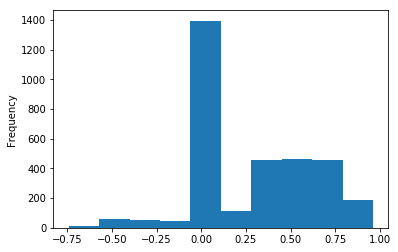

In [ ]:
dff['score'].plot.hist()

# Topic Modeling

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re

import gensim
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim import corpora, models, similarities

from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet

import numpy
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") 

In [ ]:
len(df)

3185

In [ ]:
len(dff)

3233

In [ ]:
df1= df.head(2000)

In [ ]:
dff1= dff.head(2000)

In [ ]:
df1 = df1['cleaned']
df1.head(1)

0    modern paul every player gibson theoriginal on...
Name: cleaned, dtype: object

In [ ]:
dff1 = dff1['cleaned']
dff1.head(1)

0    duff mckagan deluxe precision bass inspired ja...
Name: cleaned, dtype: object

In [ ]:
texts = df1.values
len(texts)

2000

In [ ]:
for i in texts[:2]:
    print(i)

modern paul every player gibson theoriginal onlyagibsonisgoodenough
relevant gibson modern collection gibson theoriginal onlyagibsonisgoodenough


In [ ]:
# Remove useless numbers and alphanumerical words
documents = [ re.sub("[^a-zA-Z0-9]", " ", document) for document in texts]

# tokenize
texts = [  document.lower().split() for document in documents ]

# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
texts = [ [ lmtzr.lemmatize(word) for word in tokens   ]  for tokens in texts     ]

#porter_stemmer = PorterStemmer()
#texts = [[porter_stemmer.stem(word) for word in text ] for text in texts]

# remove common words 
stoplist = stopwords.words('english')
texts = [[word for word in tokens if word not in stoplist ] for tokens in texts]

#remove short words
texts = [[word for word in tokens if len(word) >= 3] for tokens in texts]

In [ ]:
dictionary = Dictionary(texts)
dictionary.save('data/gibson.dict')  # store the dictionary, for future reference

len(dictionary)

3495

In [ ]:
## Remove rare and common tokens.
# ignore words that appear in less than 5 documents or more than 50% documents (remove too frequent & infrequent words) - an optional step
dictionary.filter_extremes(no_below=5, no_above=0.5) #https://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary.filter_extremes
len(dictionary)

553

In [ ]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('data/gibson.mm', corpus)  # store to disk, for later use  # store to disk, for later use
len(corpus)

2000

In [ ]:
print(('Number of unique tokens: %d' % len(dictionary)))
print(('Number of documents: %d' % len(corpus)))

Number of unique tokens: 553
Number of documents: 2000


In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet

# setting random seed to get the same results each time. Remove this line for HW
numpy.random.seed(1)
for k in range(2, 10):
    goodLdaModel = ldamodel.LdaModel(
        corpus=corpus, id2word=dictionary, num_topics=k, passes=50)
    goodcm = CoherenceModel(model=goodLdaModel, corpus=corpus,
                            dictionary=dictionary, coherence='u_mass')
    print(goodcm.get_coherence())

-13.232288169875247


In [ ]:
numpy.random.seed(1)
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=12,passes= 20)
                                    

In [ ]:
model.save('data/lda.model')

In [ ]:
model.show_topics(num_topics=12)

In [ ]:
lda_corpus = model[corpus]

results = []
for i in lda_corpus:
    
    results.append(i)


In [ ]:
toptopic = [max(collection, key=lambda x: x[1])[0] for collection in results]
toptopic[:5]

In [ ]:
toptopic = pd.DataFrame(toptopic)
documents = pd.DataFrame(documents)
documents = documents.rename(columns={0: 'documents'})
summary = documents.join(toptopic)
summary.head()

In [ ]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, dictionary)
vis

In [ ]:
texts1 = dff1.values
len(texts1)

In [ ]:
for i in texts1[:2]:
    print(i)

In [ ]:
documents = [ re.sub("[^a-zA-Z0-9]", " ", document) for document in texts1]

# tokenize
texts1 = [  document.lower().split() for document in documents ]

# stemming words: having --> have; friends --> friend
lmtzr = WordNetLemmatizer()
texts1 = [ [ lmtzr.lemmatize(word) for word in tokens   ]  for tokens in texts1     ]

#porter_stemmer = PorterStemmer()
#texts = [[porter_stemmer.stem(word) for word in text ] for text in texts]

# remove common words 
stoplist = stopwords.words('english')
texts1 = [[word for word in tokens if word not in stoplist ] for tokens in texts1]

#remove short words
texts1 = [[word for word in tokens if len(word) >= 3] for tokens in texts1]

In [ ]:
dictionary = Dictionary(texts1)
dictionary.save('data/fender.dict')  # store the dictionary, for future reference

len(dictionary)

In [ ]:
dictionary.filter_extremes(no_below=5, no_above=0.5) #https://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary.filter_extremes
len(dictionary)

In [ ]:
corpus = [dictionary.doc2bow(text) for text in texts1]
corpora.MmCorpus.serialize('data/fender.mm', corpus)  # store to disk, for later use  # store to disk, for later use
len(corpus)

In [ ]:
print(('Number of unique tokens: %d' % len(dictionary)))
print(('Number of documents: %d' % len(corpus)))

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet

# setting random seed to get the same results each time. Remove this line for HW
numpy.random.seed(1)
for k in range(2, 10):
    goodLdaModel = ldamodel.LdaModel(
        corpus=corpus, id2word=dictionary, num_topics=k, passes=50)
    goodcm = CoherenceModel(model=goodLdaModel, corpus=corpus,
                            dictionary=dictionary, coherence='u_mass')
    print(goodcm.get_coherence())

In [ ]:
numpy.random.seed(1)
modelf = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=10,passes= 20)
                                    

In [ ]:
modelf.show_topics(num_topics=12)

In [ ]:
lda_corpus = modelf[corpus]

results = []
for i in lda_corpus:
    
    results.append(i)


In [ ]:
toptopic = [max(collection, key=lambda x: x[1])[0] for collection in results]
toptopic[:5]

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(modelf, corpus, dictionary)
vis

# Network Analytics

In [ ]:
df.head(4)

In [ ]:
df2 = df.head(1000)


In [ ]:
tweets = df2.values
len(tweets)

In [ ]:
hashtag_network = []
for tweet in tweets:
    data = re.sub("[^a-zA-Z0-9#]+", " ", tweet[2])
    hashtag = re.findall(r"(?<=#)\w+", str(data).lower())
    hashtag_network.append(hashtag)

In [ ]:
hashtag_network[:20]

In [ ]:
from itertools import combinations
cohashtags = [x for d in hashtag_network for x in combinations(d, 2)]
cohashtags[:20]

In [ ]:
outfile = open("data/cohashtag_network2.csv", "w", newline='')
w = csv.writer(outfile)
for i in cohashtags:
    w.writerow(i)    
outfile.close()

In [ ]:
from IPython.display import Image
Image("data/gibson.png")

In [ ]:
dff2 = dff.head(1000)

In [ ]:
dff.head(20)

In [ ]:
tweets = dff2.values
len(tweets)

In [ ]:
hashtag_network = []
for tweet in tweets:
    data = re.sub("[^a-zA-Z0-9#]+", " ", tweet[2])
    hashtag = re.findall(r"(?<=#)\w+", str(data).lower())
    hashtag_network.append(hashtag)

In [ ]:
hashtag_network[:10]

In [ ]:
from itertools import combinations
cohashtags = [x for d in hashtag_network for x in combinations(d, 2)]
cohashtags[:20]

In [ ]:
outfile = open("data/cohashtag_network5.csv", "w", newline='')
w = csv.writer(outfile)
for i in cohashtags:
    w.writerow(i)    
outfile.close()

In [ ]:
from IPython.display import Image
Image("data/fender.png")

# Story Telling

    After performing my anaysis of Gibson and Fender guitars I uncovered some very interesting information. The first thing that I did in My analysis was a word frequency analysis along with word clouds for each company. Analyzing tweets that the company uses for promotion and other activities. I found that Gibson mentions things like rock, les paul, gibson custom, and namm. Fender mentioned words such as happy, bass, guitar, stratocaster, and telecaster. This is good to know from a managerial perspective for one you can get an idea of topics that are frequently tweeted about by your firm and maybe find some topics that should be promoted more frequently.
    
    I then moved on to sentiment analysis. I used vader sentiment for this analysis. I found that the average sentiment of a Gibson tweet was .233 and the average score for a Fender tweet was .264. Although both scores are very close this implies that Gibson discuess slightly more negative things than Fender which is something a manger might want to know. I also used graphs to visualize distrubutions of the scores to see if there was any discrepencies both distrubtutions were very close to one antother. 
    
    After this I used topic modeling. This was to categorize the tweets for each company and determine the optimal number of topics for categoizing said tweets. Ultimatly I found that Gibson has around 12 topics that tweets can be categorized into while fender has around 10. This is important information to know becasue maybe one company is too focused on their tweets or the other is to broad. Another thing this is good for is to understand the kinds of things that the company frequently tweets about and how they are related to one another. 
    
    Finally I performed a network analysis. I used cohashtag approach and an eigenvector analysis for the images that I uploaded in this file. This can be used by a manager to better understand what topics and hastags are interrelated and maybe find some things that are interelated that is unexpected. 
    
    Overall I am proud of my analysis and I think that there is plenty of business intelligence that can be used by a manager in their decsion making process on how to more effectivly use social media.
